In [1]:
import sys  
sys.path.insert(1, '/Users/asifahmed/Documents/Codes/MyRecourseProject')

from models.model_trainer import ModelTrainer
from evaluation.evaluator import Evaluator
from visualization.visualizer import Visualizer
from data_handling.crdit_data import Credit
from explainability.explainer_factory import get_explainer
import pandas as pd
from data_handling.dataset import Dataset

In [2]:
data_instance = Dataset(target_column='A14')
data_instance.load_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/heart.csv')
data_instance.encode_categorical_columns()

CSV file loaded successfully with delimiter: ','


In [ ]:
data_instance.print_features_names()

In [ ]:
data_instance.balanced_sample(500)

In [3]:
data_instance.select_features(['A14', 'A4', 'A5'])
# data_instance.filter_non_zero()


Selected features are now active: ['A14', 'A4', 'A5']


In [ ]:
data_instance.print_duplicate_rows_excluding_columns(exclude_columns='A14')

In [ ]:
data_instance.merge_duplicates_assign_majority(exclude_columns='A14')

In [ ]:
data_instance.remove_outliers()

In [ ]:
print((data_instance.data['A14']==1).sum())


In [ ]:
data_instance.print_numerical_columns()

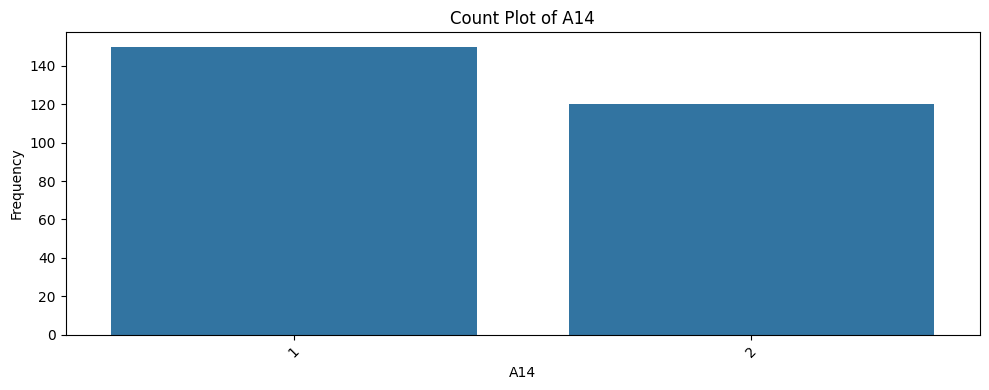

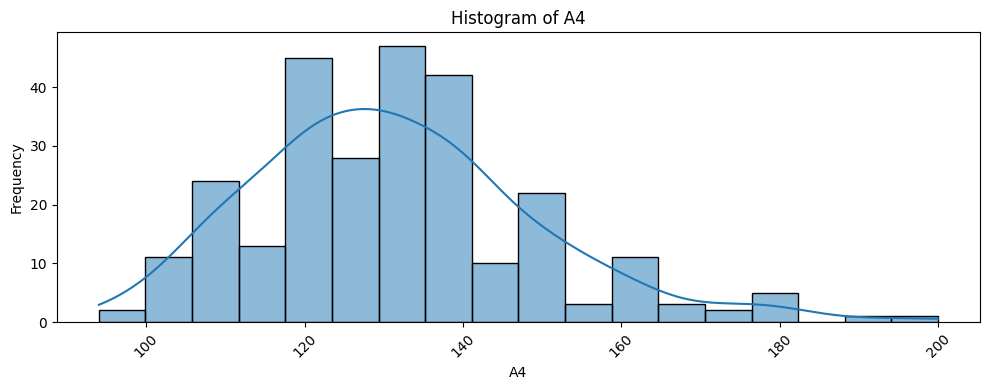

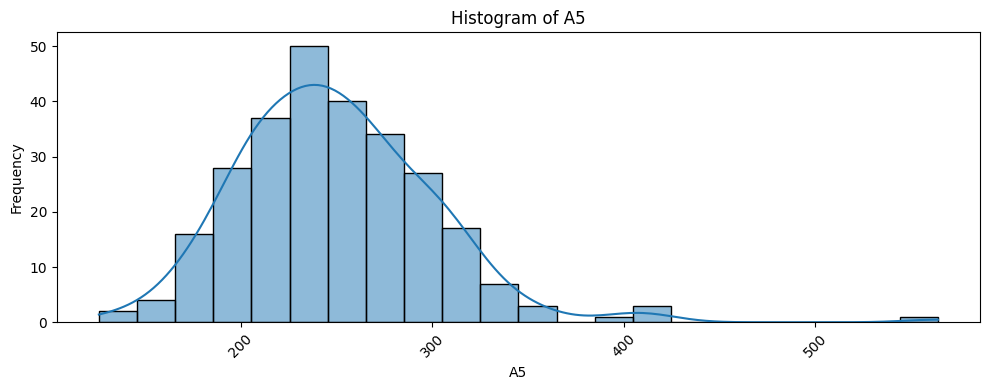

In [4]:
data_instance.plot_histogram()

In [ ]:
print(data_instance.data.dtypes)

In [5]:
trainer = ModelTrainer()

data = trainer.normalize_columns(data=data_instance.data, exclude_columns='A14')

trainer.split_data(data, target_column='A14')


model = trainer.train('svm')

evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
evaluator.report()

Data columns before any operation: Index(['A14', 'A4', 'A5'], dtype='object')
Numerical columns detected: Index(['A14', 'A4', 'A5'], dtype='object')
Numerical columns after excluding: ['A4', 'A5']
Numerical columns normalized.
Data split into train and test sets.
svm model trained successfully.
Accuracy: 0.42592592592592593
Precision: 0.42592592592592593
Recall: 1.0
F1 Score: 0.5974025974025974
Confusion Matrix:
 [[23  0]
 [31  0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.43      1.00      0.60        23
           2       0.00      0.00      0.00        31

    accuracy                           0.43        54
   macro avg       0.21      0.50      0.30        54
weighted avg       0.18      0.43      0.25        54



/opt/anaconda3/envs/research/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/research/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/research/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

/opt/anaconda3/envs/research/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


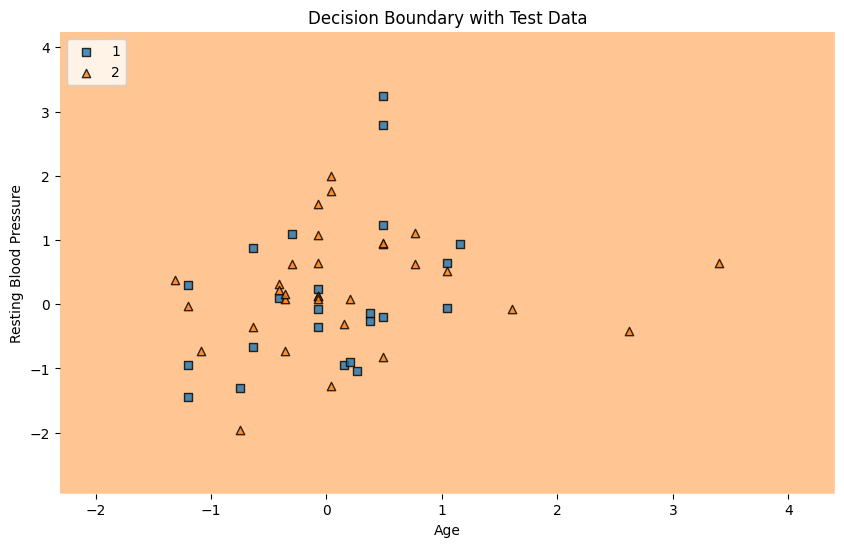

In [6]:
visualizer = Visualizer(model, trainer.X_test, trainer.y_test)
feature_names = ('Age', 'Resting Blood Pressure')
visualizer.plot_decision_boundary(feature_names)

In [ ]:
import sys  
sys.path.insert(1, '/Users/asifahmed/Documents/Codes/MyRecourseProject')

from models.model_trainer import ModelTrainer
from evaluation.evaluator import Evaluator
from visualization.visualizer import Visualizer
from data_handling.crdit_data import Credit
from explainability.explainer_factory import get_explainer
import pandas as pd
from data_handling.dataset import Dataset


data_instance = Dataset(target_column='A15')
data_instance.load_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/australian.csv')
data_instance.encode_categorical_columns()

data_instance.select_features(['A15', 'A5', 'A10'])

trainer = ModelTrainer()

data = trainer.normalize_columns(data=data_instance.data, exclude_columns='A15')

trainer.split_data(data, target_column='A15')


model = trainer.train('logistic_regression')

evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
evaluator.report()

visualizer = Visualizer(model, trainer.X_test, trainer.y_test)
feature_names = ('Most Recent Bill Amount', 'Most Recent Payment Amount')
visualizer.plot_decision_boundary(feature_names)

In [ ]:
data_instance.print_continuous_columns()

In [ ]:
# Generate explanations using DICE
continuous_features = ['A2', 'A14']
explainer = get_explainer('dice', model=model, data=data_instance.data,
                          continuous_features=continuous_features,
                          outcome_name='A15')
query_instance = trainer.X_test.iloc[0:5]  # Selecting the first test instance
counterfactuals = explainer.generate_explanation(query_instance, total_CFs=5)